In [1]:
from keras.layers import Input, Dense
from keras import regularizers
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
file = r'carbon_nanotubes.csv'
df = pd.read_csv(file, delimiter=';', header=None, decimal=',', skiprows=1)
x_train = df.drop([0,1], axis=1).values
print('Shape of data :', x_train.shape)

Shape of data : (10721, 6)


<img src="img/multi.png" width="400">

In [3]:
input_size = 6
hidden_size = 4
coded_size = 3

x = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(x)
coded = Dense(coded_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(coded)
r = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(inputs=x, outputs=r)
encoder = Model(inputs=x, outputs=coded)

### create model to decoder
# retrieve the last layer of the autoencoder model. This the latent vector already IT.
# just have to add a shape IT. 
decoder_input = Input(shape=(coded_size,))
next_input = decoder_input

# the next_input keeps looping getting carried into the next layer as the data vector IT.
for layer in autoencoder.layers[-2:]:
    next_input = layer(next_input)
    
decoder = Model(inputs=decoder_input, outputs=next_input)

# The loop above is the same as this
# decoder_input= Input(shape=(coded_size, ))
# next_input = decoder_input
# next_input = autoencoder.layers[4](next_input)
# next_input = autoencoder.layers[5](next_input)

In [4]:
for i, layer in enumerate(autoencoder.layers):
    print('layer', str(i+1))

layer 1
layer 2
layer 3
layer 4
layer 5


In [5]:
autoencoder.compile(optimizer='adam', loss='mse')

epochs=20
batch_size=256

fitted_history = autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True)

Epoch 1/20
10721/10721 [==============================] - 0s - loss: 0.0824     
Epoch 2/20
10721/10721 [==============================] - 0s - loss: 0.0803     
Epoch 3/20
10721/10721 [==============================] - 0s - loss: 0.0784     
Epoch 4/20
10721/10721 [==============================] - 0s - loss: 0.0760     
Epoch 5/20
10721/10721 [==============================] - 0s - loss: 0.0733     
Epoch 6/20
10721/10721 [==============================] - 0s - loss: 0.0703     
Epoch 7/20
10721/10721 [==============================] - 0s - loss: 0.0673     
Epoch 8/20
10721/10721 [==============================] - 0s - loss: 0.0645     
Epoch 9/20
10721/10721 [==============================] - 0s - loss: 0.0621     
Epoch 10/20
10721/10721 [==============================] - 0s - loss: 0.0601     
Epoch 11/20
10721/10721 [==============================] - 0s - loss: 0.0583     
Epoch 12/20
10721/10721 [==============================] - 0s - loss: 0.0567     
Epoch 13/20
10721/10721 [

dict_keys(['loss'])


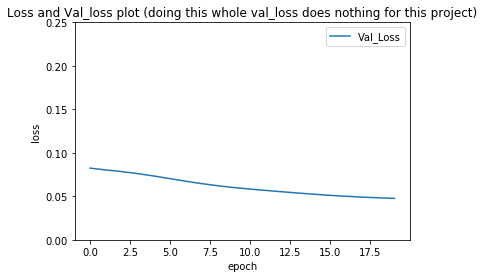

In [6]:
print(fitted_history.history.keys())

plt.plot(fitted_history.history['loss'])
#plt.plot(fitted_history.history['val_loss'])
plt.ylim(0,.25)
plt.title('Loss and Val_loss plot (doing this whole val_loss does nothing for this project)')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Val_Loss', 'Loss'])

In [7]:
# predictions
encoded_train = encoder.predict(x_train)
decoded_train = decoder.predict(encoded_train)

In [8]:
print('Encoded shape: ', encoded_train.shape)
encoded_train

Encoded shape:  (10721, 3)


array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.4255906 ,  0.        ,  0.        ],
       ..., 
       [ 0.09353051,  0.        ,  0.        ],
       [ 0.13083979,  0.        ,  0.        ],
       [ 0.01589045,  0.        ,  0.        ]], dtype=float32)

In [9]:
print('Decoded shape: ', decoded_train.shape)

decoded_train

Decoded shape:  (10721, 6)


array([[ 0.67697066,  0.66753644,  0.37858295,  0.68321443,  0.63293874,
         0.37054521],
       [ 0.67697066,  0.66753644,  0.37858295,  0.68321443,  0.63293874,
         0.37054521],
       [ 0.51170677,  0.5304535 ,  0.44583368,  0.53397626,  0.50855535,
         0.43387362],
       ..., 
       [ 0.64727056,  0.64978617,  0.38787204,  0.66392827,  0.61309034,
         0.37667924],
       [ 0.63280231,  0.64076799,  0.39144513,  0.65428829,  0.60328996,
         0.37932062],
       [ 0.67531955,  0.66723895,  0.38038588,  0.68260479,  0.63223487,
         0.37130487]], dtype=float32)

# Using the MNIST Data Set 

In [10]:
# # sanity check to make sure it works

# from keras.datasets import mnist
# import numpy as np
# (x_train, _), (x_test, _) = mnist.load_data()

# x_train = x_train.astype('float32') / 255.
# x_test = x_test.astype('float32') / 255.
# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
# x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
# print(x_train.shape)
# print(x_test.shape)

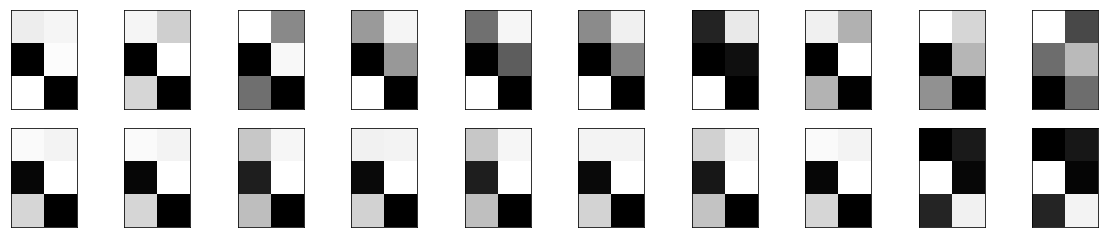

In [12]:
# sanity check when using the pictures dataset
# Visualizations of the coded representations.

import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(3, 2))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_train[i].reshape(3, 2))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()